<a href="https://colab.research.google.com/github/AnandDaksh/Crop-Disease-Classification/blob/main/(VGG_16)_Tomato_Plant_Village_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
#Load and preprocess data using TensorFlow utilities
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [3]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Plant Village/Tomato/Train',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical')


Found 10279 images belonging to 10 classes.


In [5]:
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Plant Village/Tomato/Test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 5742 images belonging to 10 classes.


In [6]:
# Load pre-trained VGG-16 without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 3s 0us/step


In [7]:
# Freeze the base model layers
base_model.trainable = False

In [8]:
# Create new model on top
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])

In [9]:
# Compile the model
model.compile(optimizer=optimizers.Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Add learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-7)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=4,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    callbacks=[reduce_lr])

Epoch 1/4
160/160 [==============================] - 10136s 63s/step - loss: 1.5423 - accuracy: 0.5178 - val_loss: 0.7758 - val_accuracy: 0.7613 - lr: 0.0010
Epoch 2/4
131/160 [=======================>......] - ETA: 19:28 - loss: 1.0331 - accuracy: 0.6413

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

In [ ]:
# Plot confusion matrix
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=-1)
conf_matrix = confusion_matrix(y_true, y_pred)
accuracy_percentage = test_acc * 100

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel(f'Predicted labels\nAccuracy: {accuracy_percentage:.2f}%')
plt.ylabel(f'True labels\nAccuracy: {accuracy_percentage:.2f}%')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy_percentage:.2f}%')
plt.show()

Whole code in One Go(Copy it and paste it on another plateforms)

Found 10279 images belonging to 10 classes.
Found 5742 images belonging to 10 classes.
58889256/58889256 [==============================] - 0s 0us/step


180/180 [==============================] - 2968s 16s/step - loss: 0.8895 - accuracy: 0.7344
Test accuracy: 0.7344130873680115
180/180 [==============================] - 2975s 17s/step


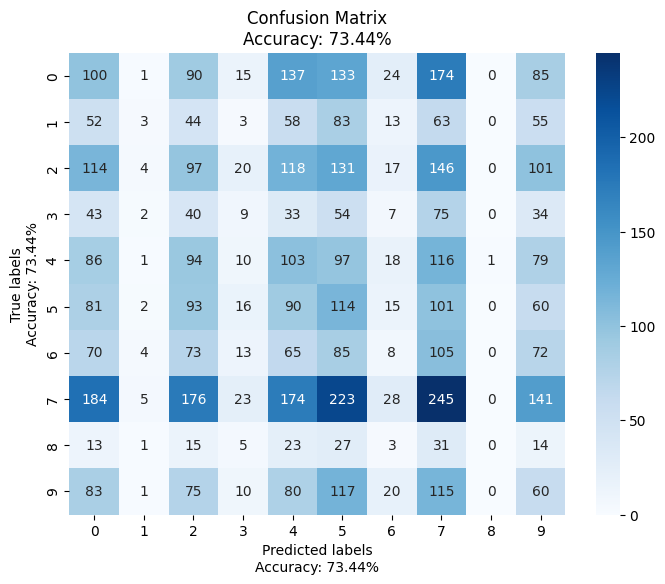

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load and preprocess data using TensorFlow utilities
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Plant Village/Tomato/Train',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Plant Village/Tomato/Test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

# Load pre-trained VGG-16 without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Create new model on top
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(optimizer=optimizers.Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Add learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-7)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=2,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    callbacks=[reduce_lr])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

# Plot confusion matrix
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=-1)
conf_matrix = confusion_matrix(y_true, y_pred)
accuracy_percentage = test_acc * 100

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel(f'Predicted labels\nAccuracy: {accuracy_percentage:.2f}%')
plt.ylabel(f'True labels\nAccuracy: {accuracy_percentage:.2f}%')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy_percentage:.2f}%')
plt.show()
